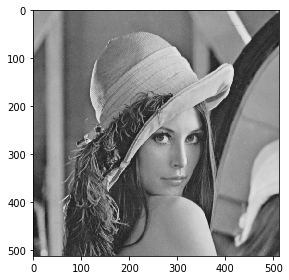

In [14]:
# Read lena.bmp
from skimage import io
lena = io.imread("lena.bmp")
io.imshow(lena)
height = len(lena)
width = len(lena[0])

In [15]:
from tqdm import tqdm_notebook as tqdm
def blank_image(height, width):
    return np.array([[0 for i in range(width)] for j in range(height)])
def dilation(img, kernel):
    print("---dilation start---")
    return_img = blank_image(height, width)
    for i in tqdm(range(height)):
        for j in range(width):
            temp_max = 0
            for x, y in kernel:
                if((i - x) in range(0, width) and (j - y) in range(0, height)):
                    temp = img[i - x][j - y] + kernel_value(x, y)
                    if(temp >= temp_max):
                        temp_max = temp
            return_img[i][j] = temp_max
    print("---dilation end---")
    return(return_img)
def erosion(img, kernel):
    return_img = blank_image(height, width)
    print("---erosion start---")
    for i in tqdm(range(height)):
        for j in range(width):
            temp_min = 255
            for x, y in kernel:
                if((i + x) in range(0, width) and (j + y) in range(0, height)):
                    temp = img[i + x][j + y] - kernel_value(x, y)
                    if(temp <= temp_min):
                        temp_min = temp
            return_img[i][j] = temp_min
    print("---erosion end---")
    return return_img
def opening(img, kernel):
    temp = erosion(img, kernel)
    temp = dilation(temp, kernel)
    return temp
def closing(img, kernel):
    temp = dilation(img, kernel)
    temp = erosion(temp, kernel)
    return temp
def kernel_value(x, y):
    # for this task, the kernel values are always 0
    return 0

In [16]:
import numpy as np
kernel = np.array([  [0, 0], [0, 1], [0, 2], [0, -1], [0, -2], [1, 0], 
          [1, 1], [1, 2], [1, -1], [1, -2],  [-1, 0], [-1, 1], 
          [-1, 2], [-1, -1], [-1, -2], [2, 0], [2, 1], [2, -1],  
          [-2, 0], [-2, 1], [-2, -1] ])

In [17]:
temp = dilation(lena, kernel)
io.imsave("dilation.png", temp)

temp = erosion(lena, kernel)
io.imsave("erosion.png", temp)

temp = opening(lena, kernel)
io.imsave("opening.png", temp)

temp = closing(lena, kernel)
io.imsave("closing.png", temp)

---erosion start---



---erosion end---
---erosion start---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: erosion.png is a low contrast image
  warn('%s is a low contrast image' % fname)



---erosion end---
---dilation start---



---dilation end---
---dilation start---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: opening.png is a low contrast image
  warn('%s is a low contrast image' % fname)



---dilation end---
---erosion start---



---erosion end---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: closing.png is a low contrast image
  warn('%s is a low contrast image' % fname)
